<a href="https://colab.research.google.com/github/envirodatascience/final-project-insect-team/blob/main/02_temperature_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FINAL PROJECT: Insect Group

In this Colab, we will be summarizing temperature data by State and Year (2000-2024)

Data from NOAA: https://www.ncei.noaa.gov/cdo-web/datasets

Documentation: https://www.ncei.noaa.gov/data/global-summary-of-the-year/doc/GSOY_documentation.pdf

In [1]:
# import modules

import pandas as pd
import numpy as np

# plotting

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Step 1: Download and Orient to Temperature Data

In [2]:
# download the data
# Updated URL to point to the raw CSV data on GitHub

df_temp = pd.read_csv('https://raw.githubusercontent.com/envirodatascience/final-project-insect-team/main/temp_data_1900-2024.csv')

In [3]:
df_temp.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DX70,DX90,EMNT,EMXT,HTDD,TAVG,TMAX,TMIN
0,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1966,NaN,NaN,-12.0,NaN,NaN,NaN,NaN,34.7
1,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1967,NaN,NaN,-21.0,NaN,NaN,NaN,NaN,33.4
2,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1968,144.0,14.0,-14.0,97.0,NaN,46.2,59.3,33.2
3,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1969,136.0,9.0,-6.0,95.0,7001.0,47.5,59.1,35.8
4,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1970,136.0,14.0,-18.0,95.0,7134.0,47.1,58.6,35.6


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    2334 non-null   object 
 1   NAME       2334 non-null   object 
 2   LATITUDE   2334 non-null   float64
 3   LONGITUDE  2334 non-null   float64
 4   ELEVATION  2334 non-null   float64
 5   DATE       2334 non-null   int64  
 6   DX70       1663 non-null   float64
 7   DX90       1663 non-null   float64
 8   EMNT       1678 non-null   float64
 9   EMXT       1663 non-null   float64
 10  HTDD       1576 non-null   float64
 11  TAVG       1610 non-null   float64
 12  TMAX       1663 non-null   float64
 13  TMIN       1678 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 255.4+ KB


Data Documentation:


*   STATION:
*   DATE: Year
*   DX70: Number days with maximum temperature greater than 70F (21.1C)
*   DX90: Number days with maximum temperature greater than 90F (32.2C)
*   EMNT: Extreme minimum temperature
*   EMXT: Extreme maximum temperature
*   HTDD: Heating Degree Days
*   TAVG: Average Average Temperature
*   TMAX: Average Maximum Temperature
*   TMIN: Average Minimum Temperature



In [5]:
# check for duplicate rows

df_temp.duplicated().sum()

np.int64(0)

In [6]:
# ensure nunique for years is 2000 to 2024

df_temp['DATE'].unique()

array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1933, 1936, 1938, 1939, 1900,
       1901, 1902, 1903, 1904, 1935, 1937, 2009, 2010, 1905, 1906, 1907,
       1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
       1919, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1934, 1920, 1921])

In [7]:
# show value counts for the first 10 years

df_temp['DATE'].value_counts().sort_index().head(10)

,count
DATE,
1900,8
1901,8
1902,8
1903,8
1904,8
1905,7
1906,7
1907,7
1908,8


In [8]:
# show the value counts for the last 10 years

df_temp['DATE'].value_counts().sort_index().tail(10)

,count
DATE,
2015,20
2016,21
2017,22
2018,21
2019,20
2020,19
2021,19
2022,20
2023,17


The value counts show that the later years—particularly from the 2000s onward—have significantly more data entries, often at least twice as many as those from the early 1900s. This is expected because weather monitoring technology and data collection infrastructure have improved over time, coupled with an increased interest in climate data, leading to more consistent and widespread recording in recent decades. Additionally, earlier records may be sparse due to limitations in historical documentation or missing archival data.



In [9]:
df_temp.describe()

,LATITUDE,LONGITUDE,ELEVATION,DATE,DX70,DX90,EMNT,EMXT,HTDD,TAVG,TMAX,TMIN
count,2334.000000,2334.000000,2334.000000,2334.000000,1663.000000,1663.000000,1678.000000,1663.000000,1576.000000,1610.000000,1663.000000,1678.000000
mean,41.616922,-72.813490,121.643916,1970.414739,134.975947,9.415514,-6.229440,94.416115,6189.303299,49.388944,59.664943,39.082300
std,0.264904,0.506136,105.173245,31.048740,13.923399,8.054712,7.544369,3.571350,689.473959,2.261088,2.242464,2.876401
min,41.066670,-73.700000,1.800000,1900.000000,85.000000,0.000000,-32.000000,84.000000,4210.000000,42.500000,51.300000,31.600000
25%,41.400160,-73.229600,43.000000,1950.000000,126.000000,3.000000,-11.000000,92.000000,5707.750000,47.800000,58.400000,37.000000
50%,41.666670,-72.932000,109.700000,1970.000000,136.000000,7.000000,-6.000000,94.000000,6164.000000,49.400000,59.800000,39.050000
75%,41.841800,-72.350000,173.700000,1996.000000,144.000000,14.000000,-1.000000,97.000000,6633.750000,51.000000,61.100000,40.900000
max,41.998400,-71.903100,408.400000,2024.000000,175.000000,42.000000,15.000000,106.000000,8574.000000,55.600000,65.300000,48.100000


### Step 2: Clean the Data

In [10]:
# show rows with all missing values

df_temp[df_temp.isna().all(axis=1)]

# no rows with all values missing

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DX70,DX90,EMNT,EMXT,HTDD,TAVG,TMAX,TMIN


In [11]:
# display rows with tavg, tmin, and tmax for the year data missing

df_temp[(df_temp['TAVG'].isna()) & (df_temp['TMIN'].isna()) & (df_temp['TMAX'].isna())].head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DX70,DX90,EMNT,EMXT,HTDD,TAVG,TMAX,TMIN
13,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1979,NaN,NaN,NaN,NaN,6842.0,NaN,NaN,NaN
15,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1981,NaN,NaN,NaN,NaN,7110.0,NaN,NaN,NaN
17,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1983,NaN,NaN,NaN,NaN,6141.0,NaN,NaN,NaN
22,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1990,NaN,NaN,NaN,NaN,6703.0,NaN,NaN,NaN


In [12]:
# drop only rows where all three temperature fields (TAVG, TMIN, TMAX) are missing
# Justification: These rows contain no usable temperature data and cannot contribute to long-term trend analysis.
# Rows with at least one temperature value are retained to preserve as much historical information as possible.

df_temp_clean = df_temp.drop(df_temp[(df_temp['TAVG'].isna()) & (df_temp['TMIN'].isna()) & (df_temp['TMAX'].isna())].index).reset_index(drop=True)

In [13]:
# check dataframe

df_temp_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    1731 non-null   object 
 1   NAME       1731 non-null   object 
 2   LATITUDE   1731 non-null   float64
 3   LONGITUDE  1731 non-null   float64
 4   ELEVATION  1731 non-null   float64
 5   DATE       1731 non-null   int64  
 6   DX70       1663 non-null   float64
 7   DX90       1663 non-null   float64
 8   EMNT       1678 non-null   float64
 9   EMXT       1663 non-null   float64
 10  HTDD       1471 non-null   float64
 11  TAVG       1610 non-null   float64
 12  TMAX       1663 non-null   float64
 13  TMIN       1678 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 189.5+ KB


In [14]:
df_temp_clean.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DX70,DX90,EMNT,EMXT,HTDD,TAVG,TMAX,TMIN
0,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1966,NaN,NaN,-12.0,NaN,NaN,NaN,NaN,34.7
1,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1967,NaN,NaN,-21.0,NaN,NaN,NaN,NaN,33.4
2,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1968,144.0,14.0,-14.0,97.0,NaN,46.2,59.3,33.2
3,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1969,136.0,9.0,-6.0,95.0,7001.0,47.5,59.1,35.8
4,USC00069388,"WEST THOMPSON LAKE, CT US",41.9442,-71.9031,109.7,1970,136.0,14.0,-18.0,95.0,7134.0,47.1,58.6,35.6


### Step 3: Data Analysis & Graphing

In [21]:
# get a summary of the average, average maximum, and average minimum temperatures by year for each location

grouped_temp_data = df_temp_clean.groupby(['DATE']).agg({'TMIN': 'mean', 'TAVG': 'mean', 'TMAX': 'mean'}).reset_index()

grouped_temp_data.head()

,DATE,TMIN,TAVG,TMAX
0,1900,40.883333,51.050000,60.814286
1,1901,39.242857,49.040000,58.583333
2,1902,39.600000,49.420000,59.540000
3,1903,38.928571,48.785714,58.657143
4,1904,35.600000,46.025000,56.228571


In [28]:
# save the grouped_temp_data to a csv file

grouped_temp_data.to_csv('temp_summary.csv', index=False)

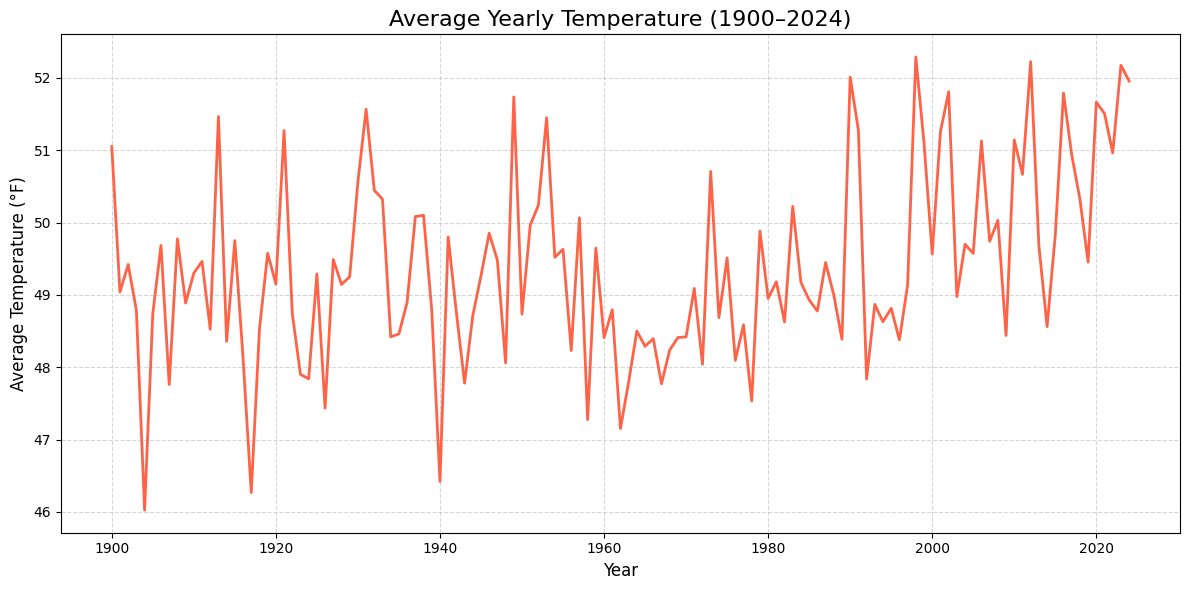

In [23]:
# make a line plot of average temperature from 1900 to 2024 at yearly intervals of 20 years. Use grouped_temp_data which has TAVG column showing avg temp for each year

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_temp_data['DATE'], grouped_temp_data['TAVG'], color='tomato', linewidth=2)

# Title and labels
plt.title('Average Yearly Temperature (1900–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°F)', fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# X-axis ticks every 20 years
plt.xticks(ticks=range(1900, 2025, 20))

# Tight layout
plt.tight_layout()
plt.show()


<ipython-input-24-0f5b20a19262>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATE', y='TAVG', data=subset, palette="Set3", width=0.4)
<ipython-input-24-0f5b20a19262>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATE', y='TAVG', data=subset, palette="Set3", width=0.4)
<ipython-input-24-0f5b20a19262>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATE', y='TAVG', data=subset, palette="Set3", width=0.4)
<ipython-input-24-0f5b20a19262>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

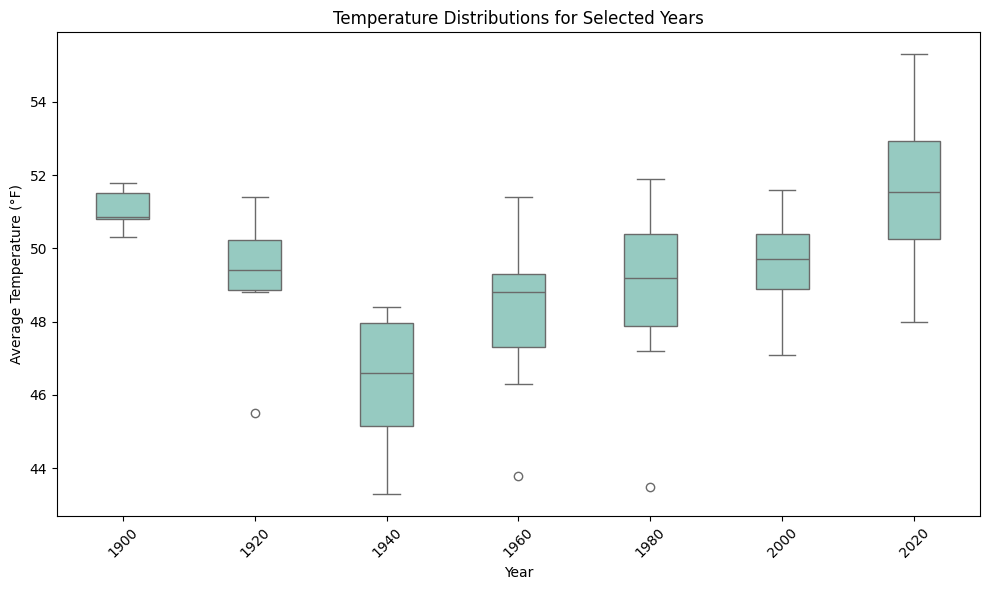

In [24]:
# prompt: make a box plot of temperature distributions for 1900, 1920, 1940, 1960, 1980, 2000, 2020

years = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
plt.figure(figsize=(10, 6))

for year in years:
    subset = df_temp_clean[df_temp_clean['DATE'] == year]
    sns.boxplot(x='DATE', y='TAVG', data=subset, palette="Set3", width=0.4)

plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.title("Temperature Distributions for Selected Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


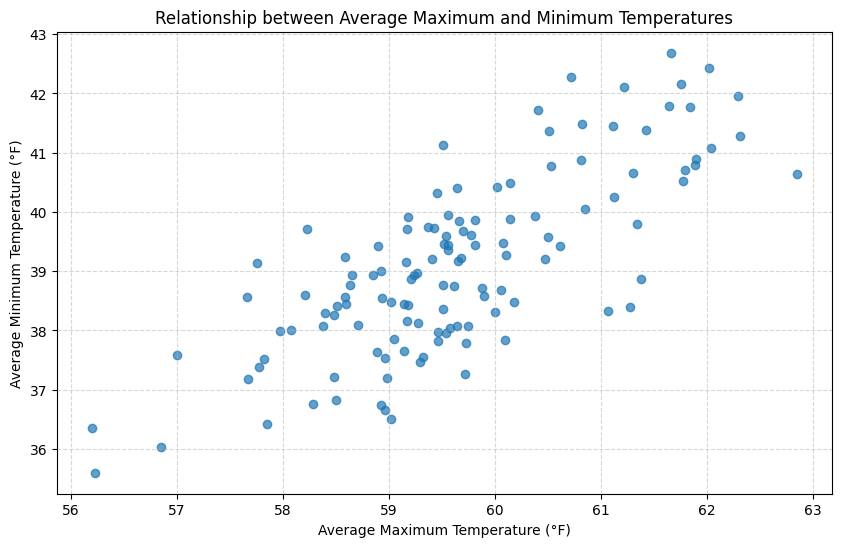

In [25]:
# make a scatter plot to show relationship between average maximum and minimum temperatures

plt.figure(figsize=(10, 6))
plt.scatter(grouped_temp_data['TMAX'], grouped_temp_data['TMIN'], alpha=0.7)  # Adjust alpha for transparency
plt.title('Relationship between Average Maximum and Minimum Temperatures')
plt.xlabel('Average Maximum Temperature (°F)')
plt.ylabel('Average Minimum Temperature (°F)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


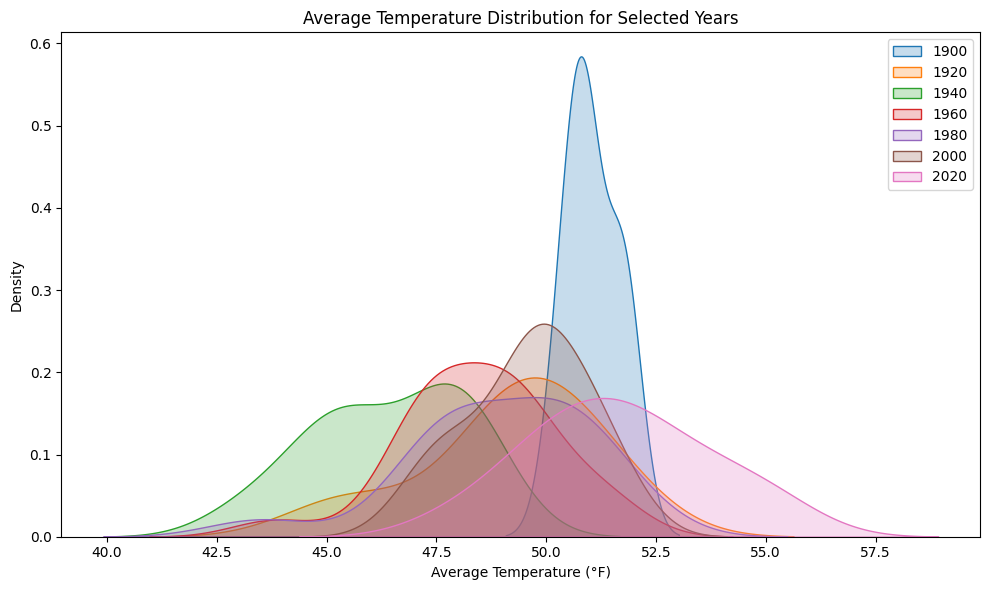

In [26]:
# make a plot of average temperature distribution for 1900, 1920, 1940, 1960, 1980, 2000, 2020

years = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
plt.figure(figsize=(10, 6))

for year in years:
    subset = df_temp_clean[df_temp_clean['DATE'] == year]
    if not subset.empty:  # Check if the subset is not empty
        sns.kdeplot(subset['TAVG'], label=str(year), fill=True)

plt.xlabel("Average Temperature (°F)")
plt.ylabel("Density")
plt.title("Average Temperature Distribution for Selected Years")
plt.legend()
plt.tight_layout()
plt.show()
